<h1><center>US Health Insurance dataset</center></h1>
<h2><center>Hio Wa Mak</center></h2>
<h3><center>10/15/2024</center><h3>

## Import Packages

In [1]:
#Import pandas, matplotlib.pyplot, and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#check current directory
#os.getcwd()

## Read in the Data

Source: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data

In [3]:
# Read in data from a csv file
insurance = pd.read_csv('insurance.csv')

## Examine Details About the Dataset

In [4]:
#Examine info on this dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Data Dictionary<br>
**Age**: The insured person's age. <br>

**Sex**: Gender (male or female) of the insured. <br>

**BMI** (Body Mass Index): A measure of body fat based on height and weight. <br>

**Children**: The number of dependents covered. <br>

**Smoker**: Whether the insured is a smoker (yes or no). <br>

**Region**: The geographic area of coverage. <br>

**Charges**: The medical insurance costs incurred by the insured person. <br>

## The US Health Insurance Dataset

In [5]:
#Number of columns and observations
insurance.shape

(1338, 7)

In [6]:
#Look at the first few observations to get an idea
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Examine Missing Data

#### Number Of Missing Values By Column

In [7]:
#Count (using `.sum()`) the number of missing values (`.isnull()`) in each column of heart_data as well as the percentages (using `.mean()` instead of `.sum()`).
#Order them (increasing or decreasing) using sort_values
#Call `pd.concat` to present these in a single table (DataFrame) with the helpful column names 'count' and '%'
missing = pd.concat([insurance.isnull().sum(), 100 * insurance.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


This dataset contains no missing data.

# Exploratory Data Analysis

### Categorical Variables -- Descriptive Statistics

In [8]:
#Select categorical variables
print(insurance.select_dtypes(include="object"))
categorical_columns = insurance.select_dtypes(include=['object']).columns

         sex smoker     region
0     female    yes  southwest
1       male     no  southeast
2       male     no  southeast
3       male     no  northwest
4       male     no  northwest
...      ...    ...        ...
1333    male     no  northwest
1334  female     no  northeast
1335  female     no  southeast
1336  female     no  southwest
1337  female    yes  northwest

[1338 rows x 3 columns]


### Examine the Freqeuncy of All Categorical Variables in the Data

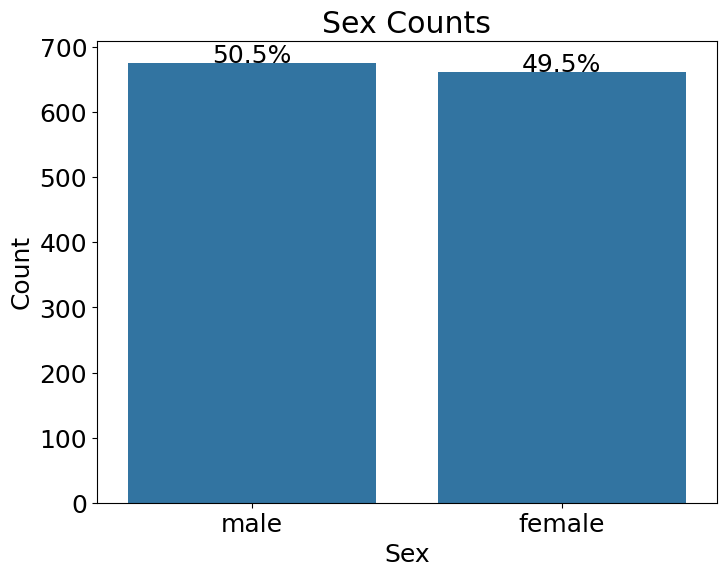

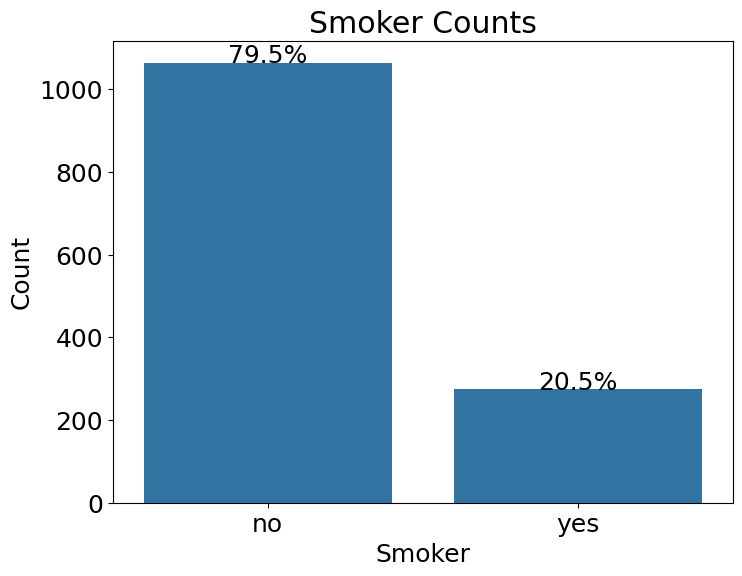

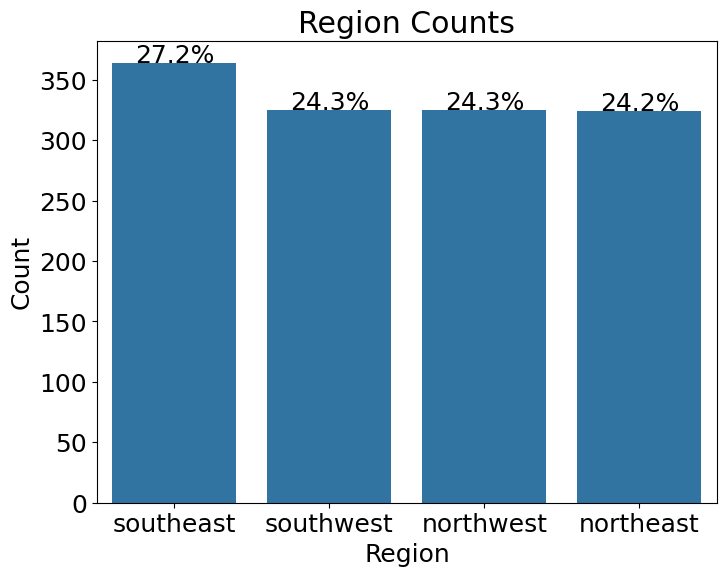

In [9]:
# Set global font size using rcParams
plt.rcParams.update({'font.size': 18})  # Set all font sizes to 18

# Loop through each categorical column and plot the bar plot with percentages
for column in categorical_columns:
    # Count the occurrences of each category
    count = insurance[column].value_counts()
    
    # Calculate percentages
    percentages = (count / count.sum()) * 100
    
    # Create the bar plot
    plt.figure(figsize=(8, 6))
    sns.barplot(x=count.index, y=count.values)
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.title(f'{column.capitalize()} Counts')

    # Add percentages on top of the bars
    for i, value in enumerate(count.values):
        percentage = f'{percentages.iloc[i]:.1f}%'  # Format the percentage to 1 decimal place
        plt.text(i, value + 0.5, percentage, ha='center')  # Add text above each bar

    # Show the plot
    plt.show()

### Continuous Variables -- Descriptive Statistics

In [10]:
#Descriptive statistics of numeric variables
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


#### Distributions

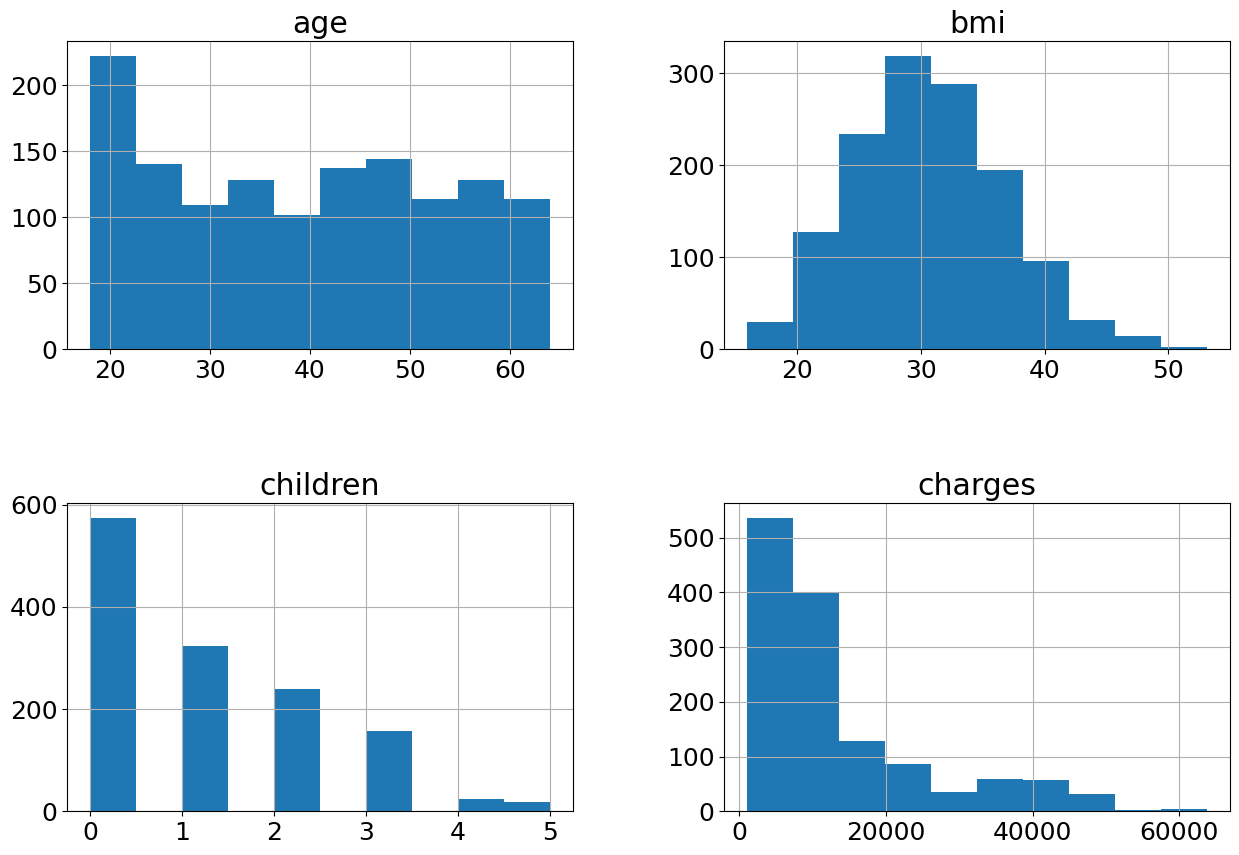

In [11]:
insurance.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

In [12]:
# See if there's something wrong with the 4 and 5 categories of `children`
print(insurance['children'].value_counts())

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


## Insurance Charges and Demographics

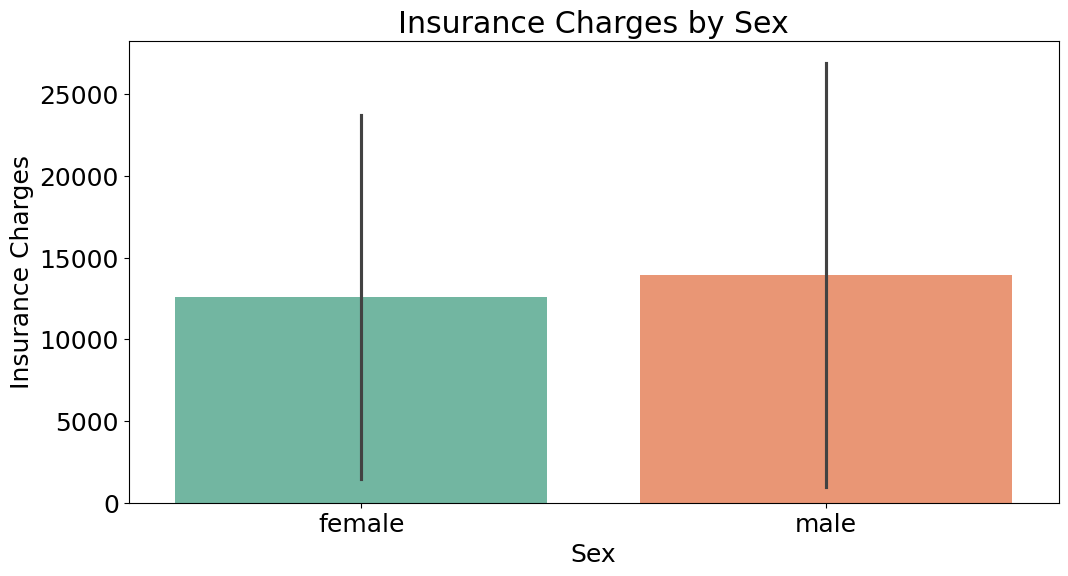

In [13]:
plt.figure(figsize=(12, 6))
sns.barplot(x='sex', y='charges', data=insurance, errorbar=('sd'), palette='Set2')
plt.title('Insurance Charges by Sex')
plt.xlabel('Sex')
plt.ylabel('Insurance Charges')
plt.show()

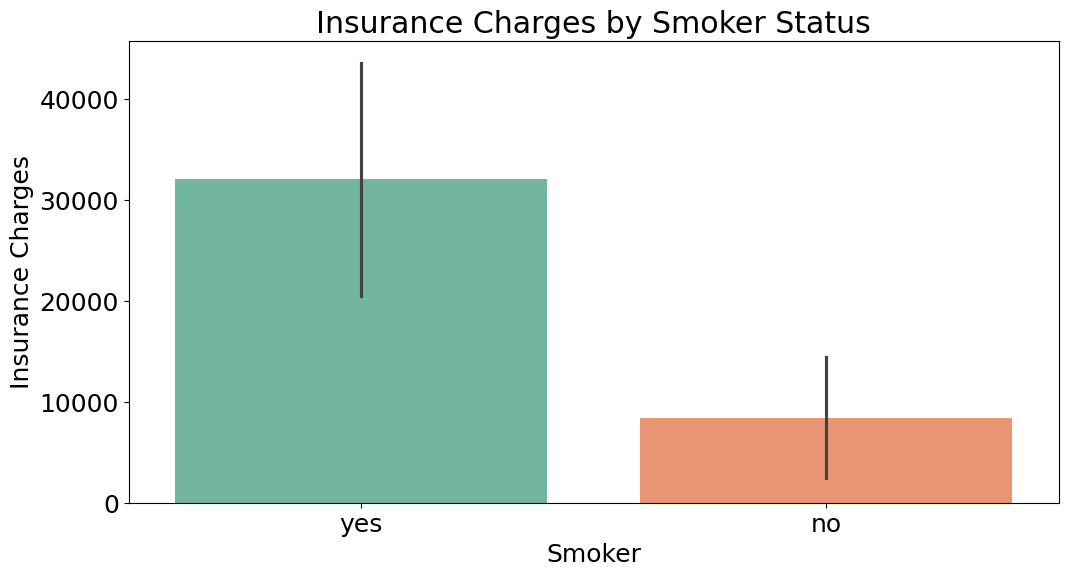

In [14]:
plt.figure(figsize=(12, 6))
sns.barplot(x='smoker', y='charges', data=insurance, errorbar=('sd'), palette='Set2')
plt.title('Insurance Charges by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Insurance Charges')
plt.show()

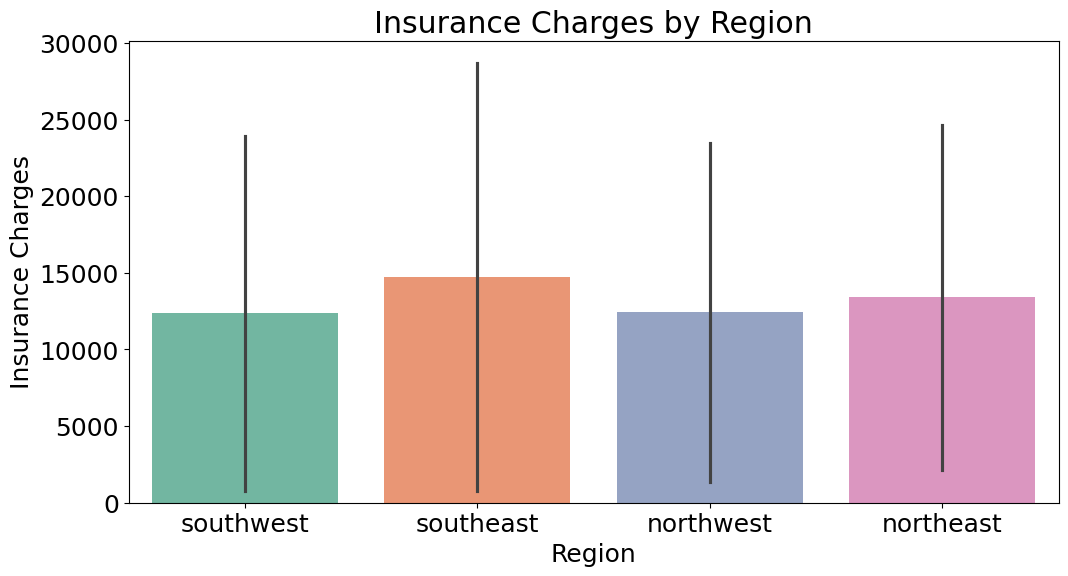

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='region', y='charges', data=insurance, errorbar=('sd'), palette='Set2')
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Insurance Charges')
plt.show()

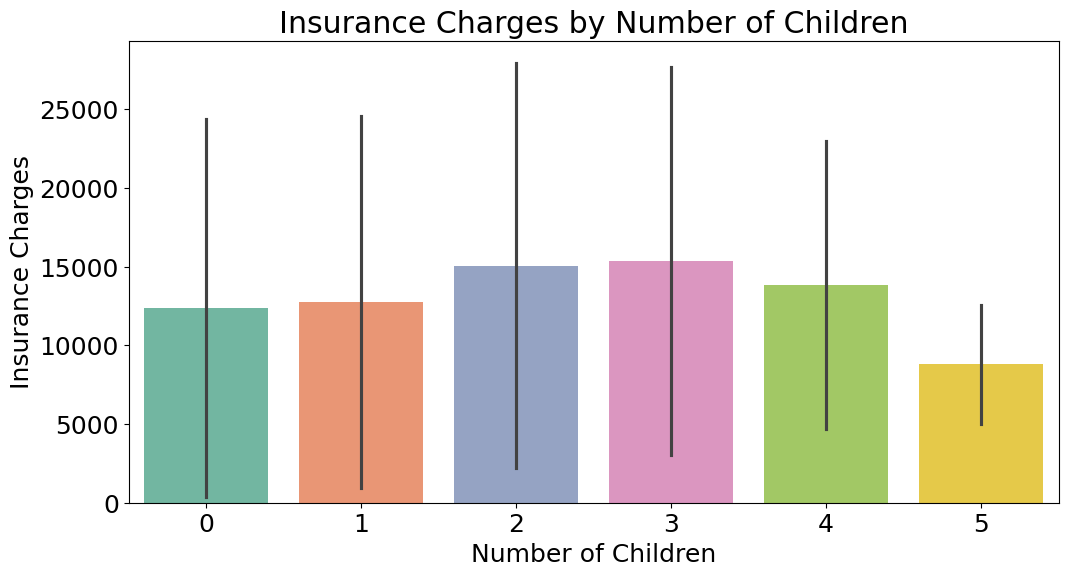

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='children', y='charges', data=insurance, errorbar=('sd'), palette='Set2')
plt.title('Insurance Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Insurance Charges')
plt.show()

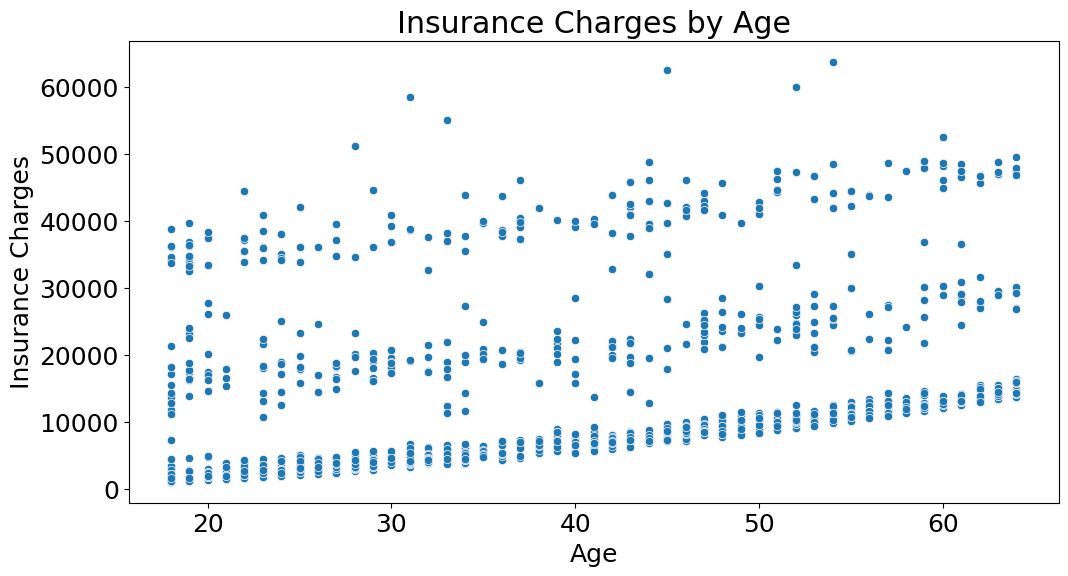

In [17]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', data=insurance)
plt.title('Insurance Charges by Age')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

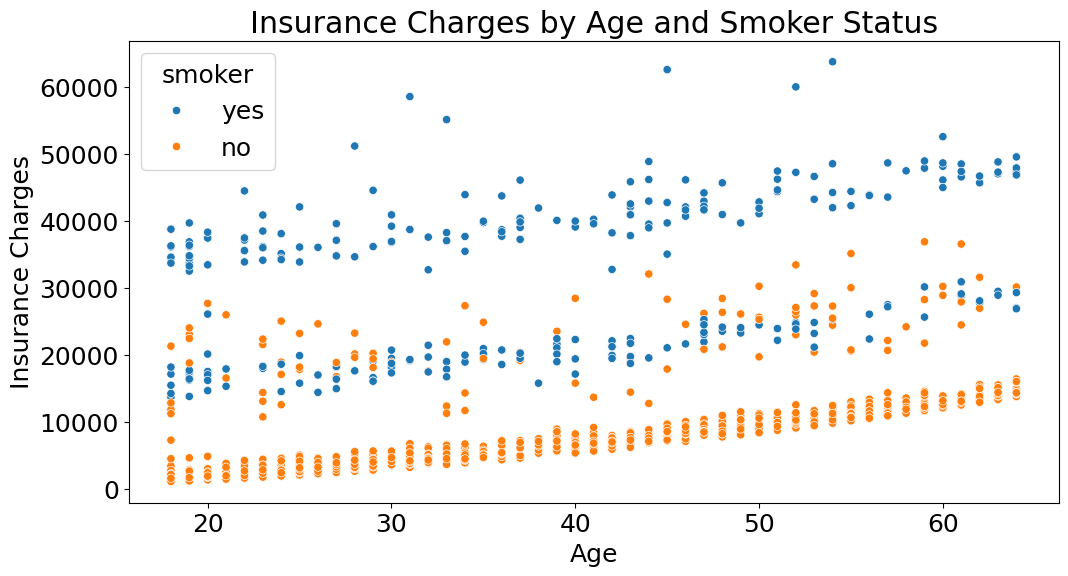

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=insurance)
plt.title('Insurance Charges by Age and Smoker Status')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

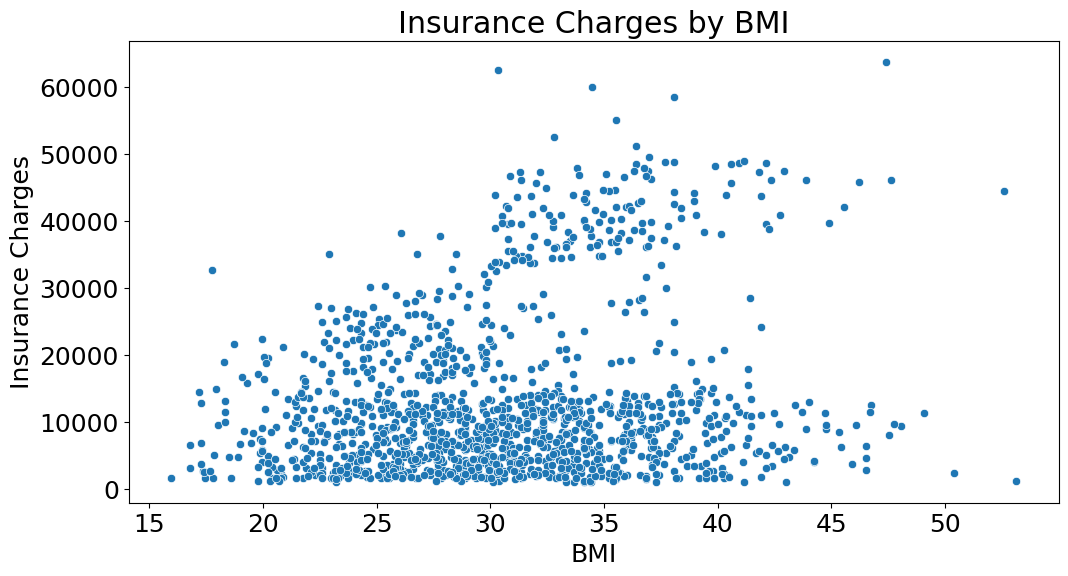

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='charges', data=insurance)
plt.title('Insurance Charges by BMI')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

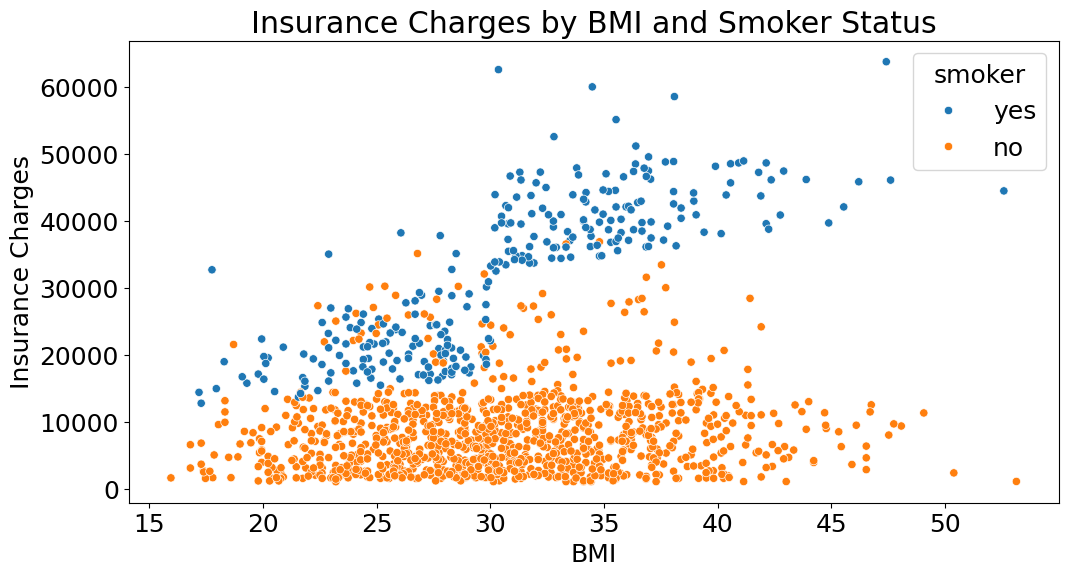

In [20]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=insurance)
plt.title('Insurance Charges by BMI and Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Insurance Charges')
plt.show()

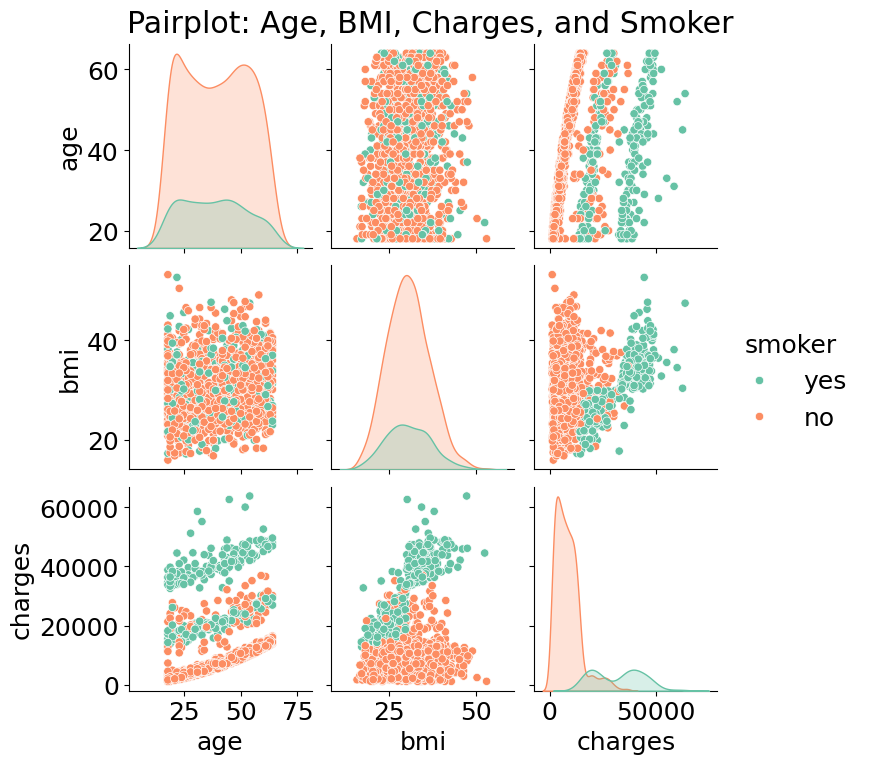

In [21]:
sns.pairplot(insurance, vars=['age', 'bmi', 'charges'], hue='smoker', palette='Set2')
plt.suptitle('Pairplot: Age, BMI, Charges, and Smoker', y=1.02)
plt.show()

## Constructing Risk Profiles

In [22]:
insurance2 = insurance.copy()

### BMI
# Define BMI categories and corresponding labels
bins = [0, 18.5, 25, 30, float('inf')]  # Define the bins for categorizing
labels = ['underweight', 'normal', 'overweight', 'obese']  # Labels for the categories

# Create a new categorical variable based on the BMI
insurance2['bmi_category'] = pd.cut(insurance2['bmi'], bins=bins, labels=labels)

### Age
# Define the bins for age categories and corresponding labels
bins = [0, 29, 49, float('inf')]  # Ranges: <30, 30-49, 50+
labels = ['young adult', 'middle-age adult', 'older adult']

# Create a new column 'age_category' based on age
insurance2['age_category'] = pd.cut(insurance2['age'], bins=bins, labels=labels)

### Risk Level
# Define conditions for risk factors
insurance2['bmi_risk'] = ((insurance2['bmi'] < 18.5) | (insurance2['bmi'] > 25)).astype(int)  # 1 if BMI < 18.5 or > 25
insurance2['age_risk'] = (insurance2['age'] >= 30).astype(int)  # 1 if age >= 30 (middle-aged and older adults)
insurance2['smoker_risk'] = (insurance2['smoker'] == 'yes').astype(int)  # 1 if smoker

# Sum risk factors to create the risk score variable
insurance2['risk_score'] = insurance2[['bmi_risk', 'age_risk', 'smoker_risk']].sum(axis=1)

print(insurance2.head())

   age     sex     bmi  children smoker     region      charges bmi_category  \
0   19  female  27.900         0    yes  southwest  16884.92400   overweight   
1   18    male  33.770         1     no  southeast   1725.55230        obese   
2   28    male  33.000         3     no  southeast   4449.46200        obese   
3   33    male  22.705         0     no  northwest  21984.47061       normal   
4   32    male  28.880         0     no  northwest   3866.85520   overweight   

       age_category  bmi_risk  age_risk  smoker_risk  risk_score  
0       young adult         1         0            1           2  
1       young adult         1         0            0           1  
2       young adult         1         0            0           1  
3  middle-age adult         0         1            0           1  
4  middle-age adult         1         1            0           2  


## Insurance Charges by Risk Profiles

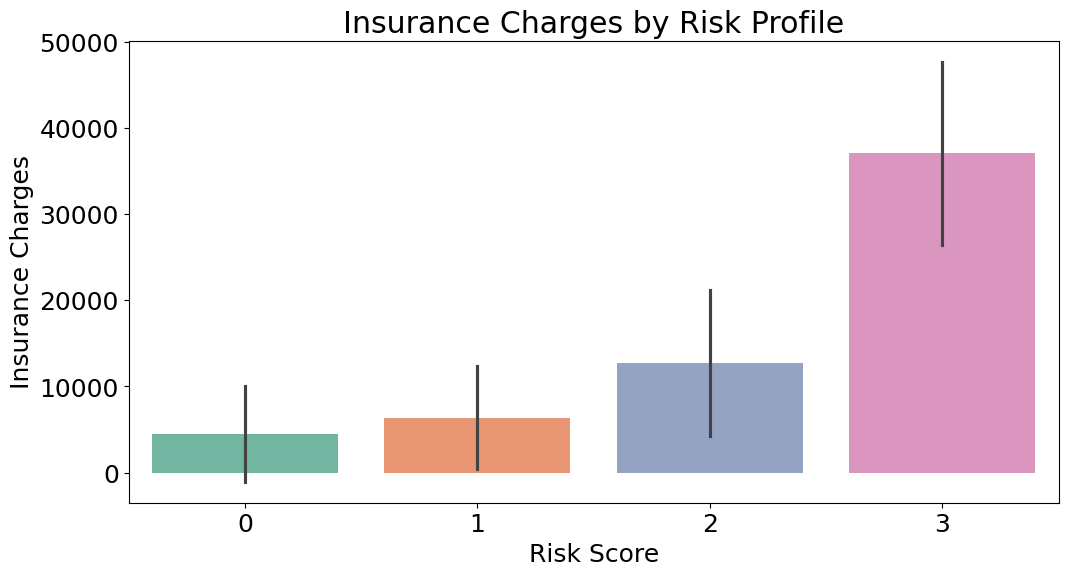

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(x='risk_score', y='charges', data=insurance2, errorbar=('sd'), palette='Set2')
plt.title('Insurance Charges by Risk Profile')
plt.xlabel('Risk Score')
plt.ylabel('Insurance Charges')
plt.show()

## Summary

The dataset used in this project is from Kaggle (https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data) and consists of 7 columns with 1,337 observations, each representing an individual. Notably, the dataset does not contain any missing data. The primary objective of this project is to perform exploratory data analysis (EDA) to explore how demographic and health-related factors are associated with insurance charges. <br> <br>

Initial data visualization reveals that smoking status (smoker vs. non-smoker), age, and BMI are linked to higher insurance charges. To further investigate, I created risk profiles to assess how these demographic variables interact within individuals. Specifically:

- Individuals classified as underweight, overweight, or obese (i.e., BMI < 18.5 or BMI > 25) received a risk score of 1. 
- Individuals aged 30 or older received a risk score of 1.
- Smokers received a risk score of 1.

The total risk score for each person was calculated by summing the scores across these domains.  <br> <br>

The analysis showed that insurance charges increased with risk scores, with individuals having the highest risk scores incurring the highest charges.